# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Tanimoto-Coefficient" data-toc-modified-id="Tanimoto-Coefficient-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tanimoto Coefficient</a></span></li><li><span><a href="#Absolute-error-<-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-<-absolute-error-<-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error->-2.00" data-toc-modified-id="Absolute-error->-2.00-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
from distutils.dir_util import copy_tree

absolute_dGoffset_path = './absolute_dGoffset_FP_only/'

if not os.path.isdir(absolute_dGoffset_path):
    os.mkdir(absolute_dGoffset_path)

if not os.path.isdir(absolute_dGoffset_path + 'features_X/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/')

if not os.path.isdir(absolute_dGoffset_path + 'labels_y/'):
    os.mkdir(absolute_dGoffset_path + 'labels_y/')

copy_tree('./absolute_dGoffset/features_X/mordred_descriptors/', 
            absolute_dGoffset_path + 'features_X/mordred_descriptors/')

['./absolute_dGoffset_FP_only/features_X/mordred_descriptors/all_descriptors.txt',
 './absolute_dGoffset_FP_only/features_X/mordred_descriptors/used_descriptors.txt',
 './absolute_dGoffset_FP_only/features_X/mordred_descriptors/discarded_descriptors.txt',
 './absolute_dGoffset_FP_only/features_X/mordred_descriptors/used_descriptors_descriptions.csv']

In [3]:
# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [4]:
def plot_scatter(dataframe, x_info, y_info, title, MAE):
    """x and y info are lists with fomrat [datatframe_index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    plt.title(title)
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    # MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = 'R-squared = {}\nMAE = {}'.format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [5]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [6]:
# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

In [7]:
# # set up feature calculator
# print("Generating features...")
# calc = Calculator(descriptors, ignore_3D=False)

# # Empty DataFrame containing only descriptor names as headings
# mordred_df = pd.DataFrame(columns=descriptors_list)

# ID_lst = []

# for mol in suppl:
#     ID = mol.strip(SDF_dr)
#     ID_lst.append(ID)
#     feat = calc.pandas(Chem.SDMolSupplier(mol))
#     mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

In [8]:
# # Insert IDs as new column with column index = 0
# mordred_df.insert(0, 'ID', ID_lst)
# mordred_df

# mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

# if os.path.exists(mordred_save_loc):
#     os.remove(mordred_save_loc)
#     mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
#     print('Existing file overwritten.')
# else:
#     mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

# print('Completed writing all calculated mordred descriptors to CSV.')

### Fingerprints

In [9]:
if not os.path.isdir(absolute_dGoffset_path + 'features_X/fingerprints_output/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/fingerprints_output/')

FP_table = []

for sdf in glob.glob(SDF_dr + '*.sdf'):
    
    FP_row = []
    
    # Append ligand ID
    FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
    # Setup fingerprint
    mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
    mol.UpdatePropertyCache(strict=False)
    
    # Calculate fingerprint
    FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
    for x in list(FP):
        FP_row.append(x)
    
    FP_table.append(FP_row)

# Column names
ID_col = ['ID']
FP_col = np.arange(0, 256).tolist()
FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

FP_df = pd.DataFrame(FP_table, columns=ID_col)
FP_df

# Save to CSV
FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

if os.path.exists(FP_save_loc):
    os.remove(FP_save_loc)
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
    print('Existing file overwritten.')
else:
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

print('Completed writing all calculated fingerprints to CSV.')

Existing file overwritten.
Completed writing all calculated fingerprints to CSV.


### Compile features

In [10]:
compiled_X_df = FP_df
# compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,pfp0,pfp1,pfp2,pfp3,pfp4,pfp5,pfp6,pfp7,pfp8,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
0,mobley_5852491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mobley_9838013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mobley_2410897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,mobley_1893815,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mobley_2008055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_4149784,0,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,6,4
638,mobley_6497672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
639,mobley_9534740,0,0,0,0,0,0,0,0,0,...,0,0,4,4,0,2,0,1,0,0
640,mobley_3980099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2


In [11]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Existing file overwritten.
Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [12]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

Number of columns dropped: 0


,pfp0,pfp1,pfp2,pfp3,pfp4,pfp5,pfp6,pfp7,pfp8,pfp9,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_5852491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mobley_9838013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mobley_2410897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
mobley_1893815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mobley_2008055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_4149784,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,6,4
mobley_6497672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mobley_9534740,0,0,0,0,0,0,0,0,0,0,...,0,0,4,4,0,2,0,1,0,0


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [13]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value


In [14]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Existing file overwritten.
Completed writing dropped columns to CSV.


### Convert all values to float

In [15]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,pfp0,pfp1,pfp2,pfp3,pfp4,pfp5,pfp6,pfp7,pfp8,pfp9,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_7326706,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0
mobley_7203421,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
mobley_8685905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_929676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_3968043,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8809190,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
mobley_9185328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_9979854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalise data

In [16]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,pfp0,pfp1,pfp2,pfp3,pfp4,pfp5,pfp6,pfp7,pfp8,pfp9,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_7326706,2.944233,3.548199,-0.055858,11.278367,-0.379862,1.547336,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,3.619304,-0.118535,4.059972,-0.110516,-0.148061,-0.478293,1.129314
mobley_7203421,-0.182645,-0.143768,-0.055858,-0.088527,0.781430,1.547336,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,-0.192990,5.317124,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_8685905,-0.182645,-0.143768,-0.055858,-0.088527,-0.379862,-0.326984,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,1.867777,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_929676,-0.182645,-0.143768,-0.055858,-0.088527,-0.379862,-0.326984,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_3968043,-0.182645,-0.143768,-0.055858,-0.088527,1.942721,3.421657,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8809190,1.380794,-0.143768,-0.055858,-0.088527,0.781430,-0.326984,-0.199428,3.056232,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.080542,0.319236
mobley_9185328,-0.182645,-0.143768,-0.055858,-0.088527,-0.379862,-0.326984,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,-0.210408,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_9979854,-0.182645,-0.143768,-0.055858,-0.088527,-0.379862,-0.326984,-0.199428,-0.320878,-0.325093,-0.098068,...,-0.264229,-0.126222,1.867777,-0.192990,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842


### Perform PCA on features alone

In [17]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 116


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116
ID,,,,,,,,,,,,,,,,,,,,,
mobley_7326706,17.880308,-7.673127,-11.173462,3.162654,-5.891499,-1.540535,-11.130057,-0.206389,3.506699,-6.860454,...,0.434125,0.310666,0.119212,-0.667756,-0.771523,0.609266,-1.126776,-0.580964,-0.136205,-1.263987
mobley_7203421,-1.263855,-0.732327,0.167526,0.431538,-0.197618,-1.268958,2.089007,-2.216830,-0.990433,0.757796,...,-0.288432,1.093264,0.088040,0.661708,0.423141,0.016512,0.515838,0.800094,-0.167759,-0.119085
mobley_8685905,-0.978474,-0.116559,0.606225,0.564516,0.123049,1.369291,-0.709250,0.554368,-2.328221,-1.196321,...,-0.113613,0.065155,-1.097823,-0.583444,-0.813559,0.514327,-1.503334,1.441575,-0.513280,-0.854370
mobley_929676,-2.759079,-1.088163,0.964065,2.121552,0.530254,-1.182838,1.022422,-1.527990,0.130600,-0.477864,...,0.327565,0.268566,-0.115966,0.096811,-0.040661,0.093995,-0.116969,-0.102652,0.089483,-0.089205
mobley_3968043,-2.516735,-1.088443,-0.077247,0.524957,-0.464621,-1.665503,0.660342,-2.186621,-1.306036,0.294717,...,0.362745,0.084887,0.064722,0.463966,-0.519051,-0.490343,0.330087,0.624326,-0.418478,-0.411609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8809190,-0.270609,-0.706036,0.287039,-2.134755,-1.098241,-2.025473,1.120364,-2.103460,2.529361,-1.218026,...,0.115667,0.456622,-0.295049,0.005687,-0.311591,-0.479763,-0.042712,-0.337181,0.580211,-0.073077
mobley_9185328,-2.797772,0.213327,0.253208,0.721624,-0.460087,-0.110990,0.061387,0.348480,-0.218561,-0.104738,...,-0.153729,-0.157426,-0.160801,0.760896,-0.047695,-0.503515,-0.520755,0.322509,0.651231,-0.064971
mobley_9979854,-1.201835,0.461306,0.924636,0.925033,-0.208038,0.082819,0.403429,1.389967,-1.041570,-0.402468,...,-0.633264,0.231967,-0.307102,-1.106627,-0.430313,0.018286,-1.388293,1.245505,-0.347715,0.247951


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [18]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, len(reduced_X.columns) + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,pfp0,pfp1,pfp2,pfp3,pfp4,pfp5,pfp6,pfp7,pfp8,pfp9,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
PC1,0.101247,0.078490,0.013960,0.035774,0.086473,0.045224,0.049518,0.004904,0.069067,0.060722,...,0.071229,0.074082,0.064721,0.073194,0.057459,0.074781,0.043730,0.075251,0.079971,0.076190
PC2,-0.043517,-0.041074,-0.020234,-0.033581,-0.031276,-0.065558,0.060369,-0.007964,-0.022157,-0.059932,...,0.005953,-0.044522,-0.037619,-0.059037,-0.008957,-0.069662,-0.045309,-0.017501,0.113294,0.193720
PC3,0.008039,0.010269,-0.022716,-0.036689,0.014044,-0.055766,0.065435,-0.003878,0.134468,-0.081218,...,-0.027539,-0.084782,0.084044,-0.051558,-0.005623,-0.080014,-0.074078,0.158213,-0.029760,-0.041568
PC4,-0.056680,-0.005903,0.022018,0.016864,-0.061116,0.044659,0.060924,-0.062424,-0.014331,0.091105,...,-0.008932,-0.035295,0.028334,0.098419,-0.028337,0.031591,0.077947,0.012015,-0.190704,0.011957
PC5,-0.023042,-0.019500,-0.017284,-0.045540,0.008830,0.015116,-0.050714,0.006201,-0.054821,-0.092380,...,0.132629,0.027122,0.038727,0.115389,-0.023127,0.005914,-0.103315,-0.037850,0.041949,0.018556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC112,0.013849,-0.124388,0.062002,-0.017328,-0.042779,0.066682,0.047945,0.146126,0.053560,-0.058945,...,-0.023349,0.075498,0.109933,0.021850,0.074392,0.062430,0.097587,-0.142294,0.007184,0.037348
PC113,-0.026079,-0.039298,0.000686,0.055574,-0.024794,0.025027,0.159042,-0.030649,-0.102114,0.012340,...,0.035186,0.002255,-0.088909,-0.015150,0.071103,-0.210737,0.035170,0.101812,-0.009318,0.086524
PC114,0.009009,-0.084283,-0.057951,0.096383,0.032005,0.152691,-0.118860,0.046015,0.009296,0.110810,...,0.077668,-0.054753,0.078230,-0.052934,0.060401,0.011217,0.085816,0.002891,0.033005,0.023879
PC115,0.096319,0.097295,0.000217,0.018421,0.003318,-0.035912,-0.023672,-0.078640,0.000133,0.027167,...,0.006860,0.048400,-0.021534,0.008057,-0.088380,-0.042131,-0.036506,0.043252,0.030470,-0.046590


In [19]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Highest contributing feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Highest contributing feature
0,PC1,pfp199
1,PC2,pfp137
2,PC3,pfp203
3,PC4,pfp95
4,PC5,pfp53
...,...,...
111,PC112,pfp83
112,PC113,pfp83
113,PC114,pfp92
114,PC115,pfp207


In [20]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Existing file overwritten.
Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [21]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [22]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 3)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,-1.49
mobley_1034539,-1.96
mobley_1036761,-0.64
mobley_1046331,1.62
...,...
mobley_9913368,-1.80
mobley_9942801,-0.38
mobley_994483,-1.23


In [23]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [24]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,dGoffset (kcal/mol)
mobley_7326706,17.880308,-7.673127,-11.173462,3.162654,-5.891499,-1.540535,-11.130057,-0.206389,3.506699,-6.860454,...,0.310666,0.119212,-0.667756,-0.771523,0.609266,-1.126776,-0.580964,-0.136205,-1.263987,4.58
mobley_7203421,-1.263855,-0.732327,0.167526,0.431538,-0.197618,-1.268958,2.089007,-2.216830,-0.990433,0.757796,...,1.093264,0.088040,0.661708,0.423141,0.016512,0.515838,0.800094,-0.167759,-0.119085,-1.21
mobley_8685905,-0.978474,-0.116559,0.606225,0.564516,0.123049,1.369291,-0.709250,0.554368,-2.328221,-1.196321,...,0.065155,-1.097823,-0.583444,-0.813559,0.514327,-1.503334,1.441575,-0.513280,-0.854370,0.27
mobley_929676,-2.759079,-1.088163,0.964065,2.121552,0.530254,-1.182838,1.022422,-1.527990,0.130600,-0.477864,...,0.268566,-0.115966,0.096811,-0.040661,0.093995,-0.116969,-0.102652,0.089483,-0.089205,-0.90
mobley_3968043,-2.516735,-1.088443,-0.077247,0.524957,-0.464621,-1.665503,0.660342,-2.186621,-1.306036,0.294717,...,0.084887,0.064722,0.463966,-0.519051,-0.490343,0.330087,0.624326,-0.418478,-0.411609,-0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_8809190,-0.270609,-0.706036,0.287039,-2.134755,-1.098241,-2.025473,1.120364,-2.103460,2.529361,-1.218026,...,0.456622,-0.295049,0.005687,-0.311591,-0.479763,-0.042712,-0.337181,0.580211,-0.073077,-0.17
mobley_9185328,-2.797772,0.213327,0.253208,0.721624,-0.460087,-0.110990,0.061387,0.348480,-0.218561,-0.104738,...,-0.157426,-0.160801,0.760896,-0.047695,-0.503515,-0.520755,0.322509,0.651231,-0.064971,-1.34
mobley_9979854,-1.201835,0.461306,0.924636,0.925033,-0.208038,0.082819,0.403429,1.389967,-1.041570,-0.402468,...,0.231967,-0.307102,-1.106627,-0.430313,0.018286,-1.388293,1.245505,-0.347715,0.247951,-0.71
mobley_2316618,14.018187,2.780288,-3.578584,-13.929373,5.095884,-4.706175,9.776304,-8.406889,-2.930139,-1.630873,...,-0.858804,0.179389,0.640000,-1.261858,0.017588,-0.652638,1.080876,-0.858501,-0.553178,-0.61


In [25]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


In [26]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [27]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,dGoffset (kcal/mol)
mobley_7326706,17.880308,-7.673127,-11.173462,3.162654,-5.891499,-1.540535,-11.130057,-0.206389,3.506699,-6.860454,...,0.310666,0.119212,-0.667756,-0.771523,0.609266,-1.126776,-0.580964,-0.136205,-1.263987,4.58
mobley_7203421,-1.263855,-0.732327,0.167526,0.431538,-0.197618,-1.268958,2.089007,-2.216830,-0.990433,0.757796,...,1.093264,0.088040,0.661708,0.423141,0.016512,0.515838,0.800094,-0.167759,-0.119085,-1.21
mobley_8685905,-0.978474,-0.116559,0.606225,0.564516,0.123049,1.369291,-0.709250,0.554368,-2.328221,-1.196321,...,0.065155,-1.097823,-0.583444,-0.813559,0.514327,-1.503334,1.441575,-0.513280,-0.854370,0.27
mobley_929676,-2.759079,-1.088163,0.964065,2.121552,0.530254,-1.182838,1.022422,-1.527990,0.130600,-0.477864,...,0.268566,-0.115966,0.096811,-0.040661,0.093995,-0.116969,-0.102652,0.089483,-0.089205,-0.90
mobley_3968043,-2.516735,-1.088443,-0.077247,0.524957,-0.464621,-1.665503,0.660342,-2.186621,-1.306036,0.294717,...,0.084887,0.064722,0.463966,-0.519051,-0.490343,0.330087,0.624326,-0.418478,-0.411609,-0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_7599023,-2.369211,0.551653,0.269342,-0.776082,-0.308798,-0.156897,0.262384,0.980469,1.116982,-0.401455,...,-0.600992,0.621588,0.118341,0.129392,0.229046,-0.042660,0.054530,0.010715,-0.092260,-0.51
mobley_8809190,-0.270609,-0.706036,0.287039,-2.134755,-1.098241,-2.025473,1.120364,-2.103460,2.529361,-1.218026,...,0.456622,-0.295049,0.005687,-0.311591,-0.479763,-0.042712,-0.337181,0.580211,-0.073077,-0.17
mobley_9185328,-2.797772,0.213327,0.253208,0.721624,-0.460087,-0.110990,0.061387,0.348480,-0.218561,-0.104738,...,-0.157426,-0.160801,0.760896,-0.047695,-0.503515,-0.520755,0.322509,0.651231,-0.064971,-1.34
mobley_9979854,-1.201835,0.461306,0.924636,0.925033,-0.208038,0.082819,0.403429,1.389967,-1.041570,-0.402468,...,0.231967,-0.307102,-1.106627,-0.430313,0.018286,-1.388293,1.245505,-0.347715,0.247951,-0.71


In [28]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


#### SDF

In [29]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [30]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,dGoffset (kcal/mol)
mobley_5282042,14.563459,3.225445,0.048119,-11.573632,-1.355112,-9.670174,7.443023,-12.444638,7.894833,-7.411212,...,0.171519,0.065788,0.077250,-0.093106,0.437961,-0.021696,0.238981,-0.110728,0.128862,-0.08
mobley_6935906,7.449230,-5.840898,-2.242065,-2.423556,1.529029,-1.802414,-3.380818,-2.860143,-1.491606,4.009232,...,0.821134,-0.401775,0.050471,-0.245940,-1.125126,-0.861060,0.273196,-0.343916,-0.075876,0.47
mobley_1944394,12.529894,0.079689,-3.271048,-10.684853,2.162608,-7.641752,5.554114,-5.132237,9.957333,-1.958046,...,-0.256022,0.404112,-0.422689,0.062950,-0.206802,-0.918053,-1.323742,-0.087145,-0.298320,-1.47
mobley_1160109,2.479932,-3.418066,-1.172754,0.860217,1.772861,-2.590723,1.196760,-1.739226,-4.278534,2.773860,...,-0.714697,-0.603188,0.310975,0.576639,1.267346,-0.753198,-0.926840,-1.690485,0.826691,-0.41
mobley_6195751,5.419629,3.556466,-1.700369,0.948996,0.404464,3.229916,-3.657963,-2.085601,-1.671208,1.981912,...,0.534776,0.396806,0.854366,-0.426691,1.159032,-0.668015,0.438992,0.274957,-0.882520,1.17
mobley_4371692,7.299412,7.672770,-2.337894,-9.758260,5.856400,1.312703,4.823426,-1.491477,-3.974150,-3.890568,...,-1.520236,0.555598,-0.551213,-0.057839,0.441435,0.379897,-0.386224,-0.635071,0.198339,1.45
mobley_3802803,-0.702276,-1.742184,2.426166,3.214947,0.490313,-1.582759,0.615445,-1.368267,0.678043,-0.297125,...,-0.209064,-0.095166,-0.289105,0.400023,-0.038359,-0.087640,-0.118174,-0.694770,-0.656222,-0.06
mobley_2636578,0.240875,-2.731345,3.311980,2.937830,0.828397,-2.199830,-0.646953,0.028368,0.229222,1.922841,...,-0.087626,1.119179,0.459544,-0.317928,-0.093121,-0.612037,0.386663,-0.124346,-0.173123,0.52
mobley_242480,7.499444,7.824702,-4.670240,-11.217698,8.039972,2.289924,4.806666,-0.613134,-5.491608,-4.583977,...,0.080108,0.247488,-0.903438,-1.087495,-0.090832,0.444103,-0.071782,-0.386857,-0.106633,3.40
mobley_2126135,-1.490107,0.301742,0.271512,-1.300242,0.001455,-0.007521,0.229222,-0.004945,1.383386,-0.112158,...,0.023136,-0.083280,0.022700,0.138263,0.360999,-0.395973,0.032029,0.004862,-0.400347,-0.89


In [31]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Completed writing full dataset to CSV.


#### SDF

In [32]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [33]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1       PC2        PC3       PC4       PC5       PC6  \
   mobley_7326706  17.880308 -7.673127 -11.173462  3.162654 -5.891499 -1.540535   
   mobley_8685905  -0.978474 -0.116559   0.606225  0.564516  0.123049  1.369291   
   mobley_3968043  -2.516735 -1.088443  -0.077247  0.524957 -0.464621 -1.665503   
   mobley_2792521  -2.043856 -0.677727  -0.130267 -0.801912  0.115495 -1.022939   
   mobley_6896128  -1.748199 -1.690646  -0.071608  2.848366  0.241731 -0.953956   
   ...                   ...       ...        ...       ...       ...       ...   
   mobley_1803862  -2.446414 -0.777702  -0.334018  1.000672 -0.329006 -0.063370   
   mobley_7610437  -1.875521 -1.016631  -0.271610  1.818310  0.866253 -0.457368   
   mobley_8809190  -0.270609 -0.706036   0.287039 -2.134755 -1.098241 -2.025473   
   mobley_9185328  -2.797772  0.213327   0.253208  0.721624 -0.460087 -0.110990   
   mobley_5520946  -2.272357  0.174507   0.477083 -0.471866 -0.242985 -0.047514   
   


### Start log file

In [34]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Tue Dec 10 11:58:03 2019


### Define SVR

In [35]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [36]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0262555196192653
MAE/MAD: 0.7857300159499228
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9972188278071521
MAE/MAD: 0.6026164678339785
MAE/MAD: 0.97087775468705
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9887071020151709


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/

MAE/MAD: 0.6805405861252
MAE/MAD: 1.0247811620288356
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.8960638978176563


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.6012752620545472
MAE/MAD: 0.6816386018540719
MAE/MAD: 1.0273766678868226
MAE/MAD: 0.8165336439805732
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.6891353762321241


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9887071020151709


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0268092699301647
MAE/MAD: 0.9820845845548211
MAE/MAD: 0.9969052579991141
MAE/MAD: 1.0740933210661692
MAE/MAD: 1.0270267569049796
MAE/MAD: 0.9887071020151709


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8962237783760464
MAE/MAD: 1.0040602765441067
MAE/MAD: 0.986586123541812
MAE/MAD: 1.0081652673797838
MAE/MAD: 1.024841595935402
MAE/MAD: 0.9884654953048938
MAE/MAD: 0.9887071020151709
MAE/MAD: 0.9887071020151709


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9887071020151709
MAE/MAD: 0.7211899998178098


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.5977007460545097
MAE/MAD: 0.8862951919581102
Concluded optimal hyperparameters:
[100.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.1017838432060059
MAE/MAD: 2.652723217386607
MAE/MAD: 0.9780883390334456
MAE/MAD: 1.0376953065500938
MAE/MAD: 0.9546988989710917
MAE/MAD: 1.0376953065500938
MAE/MAD: 1.0503681540573464
MAE/MAD: 0.8516431638569104
MAE/MAD: 1.0021404023521185
MAE/MAD: 2.652723217386607
MAE/MAD: 0.91395514181522
MAE/MAD: 2.6527232173866095


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0111491057747293
MAE/MAD: 0.7192302617778206
MAE/MAD: 0.7657093665145457
MAE/MAD: 1.0449660184821385
MAE/MAD: 1.0452198176138514
MAE/MAD: 1.002358831341313
MAE/MAD: 1.0113839676684067
MAE/MAD: 0.7703301665897009
MAE/MAD: 1.005902004091295
MAE/MAD: 1.0034818968694377
MAE/MAD: 0.9753401439042922
MAE/MAD: 1.1065633623098277
MAE/MAD: 1.0455902897552731
MAE/MAD: 1.1896338337184091
MAE/MAD: 0.7180136046301402
MAE/MAD: 0.721675198270244
MAE/MAD: 0.9797251715385169
MAE/MAD: 0.9241830615933341
MAE/MAD: 0.979614533318932


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.721675198270244
MAE/MAD: 0.7226355536193196
MAE/MAD: 0.7215995880558346
MAE/MAD: 1.0133646879617368
MAE/MAD: 0.7297324077996963
MAE/MAD: 0.7472696821608953
MAE/MAD: 0.7658482706592069
MAE/MAD: 1.0080260127270473
MAE/MAD: 0.7659209500204849
Concluded optimal hyperparameters:
[10.0, 0.01, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 0.9886933223007875
MAE/MAD: 0.9948902679084639
MAE/MAD: 1.026968864383055
MAE/MAD: 2.2753108414568315
MAE/MAD: 1.0211237079731377
MAE/MAD: 2.2753108414568315
MAE/MAD: 2.2753108414568315
MAE/MAD: 0.6109054467088996
MAE/MAD: 2.27531084145683
MAE/MAD: 1.010376550482136
MAE/MAD: 2.27531084145683
MAE/MAD: 0.9905024828636855


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.7142363191043606
MAE/MAD: 0.9984841529165298
MAE/MAD: 0.9980249783193179
MAE/MAD: 0.9957483569902691
MAE/MAD: 0.9192605881146416
MAE/MAD: 1.0222381208217184
MAE/MAD: 0.9955894553881804
MAE/MAD: 0.7408622194493047
MAE/MAD: 1.0055791708075805
MAE/MAD: 1.0290661017633567
MAE/MAD: 1.0259751631447704
MAE/MAD: 1.0098318975966165
MAE/MAD: 1.0295729763322456
MAE/MAD: 0.9454720902725869
MAE/MAD: 0.991154177094092
MAE/MAD: 0.8761357823226292
MAE/MAD: 1.0200288542632612


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7408622194493047
MAE/MAD: 0.7411038344502636
MAE/MAD: 0.7862842579690995
MAE/MAD: 0.6985328310321628
MAE/MAD: 0.623679581418285


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.623679581418285
MAE/MAD: 0.7106827739036141
MAE/MAD: 0.5878123685591795
MAE/MAD: 0.6016504849874458
MAE/MAD: 0.914438847289829
MAE/MAD: 0.6119836767608543
Concluded optimal hyperparameters:
[100.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0453954237550778
MAE/MAD: 1.0108216638385779
MAE/MAD: 2.620913598099468
MAE/MAD: 2.620913598099468
MAE/MAD: 0.8779881458091107
MAE/MAD: 0.9969418476628398
MAE/MAD: 0.9939387808201353
MAE/MAD: 1.0172411560749965
MAE/MAD: 2.620913598099471
MAE/MAD: 0.9899653223804558
MAE/MAD: 0.9899653223804558


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.6887668401769632
MAE/MAD: 0.888199386730103
MAE/MAD: 0.9898118721781146
MAE/MAD: 0.8110255040952424
MAE/MAD: 0.7701837469606678
MAE/MAD: 0.98938836403968
MAE/MAD: 0.6898642224860256
MAE/MAD: 0.7255352702723558
MAE/MAD: 0.9943128868157654
MAE/MAD: 0.988008982081037
MAE/MAD: 0.9470528276363056
MAE/MAD: 0.9889524905639044
MAE/MAD: 0.841610125338215
MAE/MAD: 0.8431539043957428
MAE/MAD: 0.7234031298132368
MAE/MAD: 0.6712769441159073
MAE/MAD: 0.8787471068638592
MAE/MAD: 0.9875703196257698
MAE/MAD: 1.017448959824498
MAE/MAD: 0.9970642219857312
MAE/MAD: 1.016300033788298
MAE/MAD: 0.9899893151515959
MAE/MAD: 0.8775842042851145


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7234031298132368
MAE/MAD: 0.693589262190516
MAE/MAD: 0.7038438505629243
MAE/MAD: 0.7573342356489295
MAE/MAD: 0.6899078977061284
MAE/MAD: 0.9066939575524285
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 0.9848190852363815
MAE/MAD: 0.7301134167240986
MAE/MAD: 1.966078176665092
MAE/MAD: 0.905571995158555
MAE/MAD: 0.9768525478052585
MAE/MAD: 0.9988032279150093
MAE/MAD: 0.9884962593372677
MAE/MAD: 0.9973324161094337
MAE/MAD: 1.966078176665094
MAE/MAD: 1.966078176665092
MAE/MAD: 1.0029664456550993
MAE/MAD: 0.9176633191447686


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.002334638525409
MAE/MAD: 0.9142265778759872
MAE/MAD: 0.9962738871890139
MAE/MAD: 0.6250853822060788
MAE/MAD: 0.6753824380738754
MAE/MAD: 1.000131758815013
MAE/MAD: 1.0029829960552183
MAE/MAD: 0.889530500256661
MAE/MAD: 0.9988347472608319
MAE/MAD: 0.9881824384261555
MAE/MAD: 0.985053650969632
MAE/MAD: 0.9738876980703922
MAE/MAD: 0.6625084712331201


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.6625084712331201
MAE/MAD: 0.6729303005964618
MAE/MAD: 0.6108898131605809
MAE/MAD: 0.7547609877731539
MAE/MAD: 0.754304653250011
MAE/MAD: 0.6108898131605809


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7886593342106706
MAE/MAD: 0.806835078735141


/home/wwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.6108898131605809
MAE/MAD: 0.6289165012430465
MAE/MAD: 0.6698708696924408
MAE/MAD: 0.9866584552950043
MAE/MAD: 0.6793297226048197
MAE/MAD: 0.7339856400057986
MAE/MAD: 0.9034148539612274
Concluded optimal hyperparameters:
[100.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [37]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [38]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.775097,1,Pearsons-r
1,0.556528,1,Kendalls-tau
2,0.597701,1,MAE/MAD
3,0.659403,2,Pearsons-r
4,0.512964,2,Kendalls-tau
5,0.718014,2,MAE/MAD
6,0.774716,3,Pearsons-r
7,0.607538,3,Kendalls-tau
8,0.587812,3,MAE/MAD
9,0.715349,4,Pearsons-r


In [39]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.02626
1,1,0.78573
2,1,0.78573
3,1,0.78573
4,1,0.78573
...,...,...
35,5,0.61089
36,5,0.61089
37,5,0.61089
38,5,0.61089


### Plot convergence

In [40]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.026256,0
1,1,0.785730,1
2,1,0.785730,2
3,1,0.785730,3
4,1,0.785730,4
...,...,...,...
35,5,0.610890,35
36,5,0.610890,36
37,5,0.610890,37
38,5,0.610890,38


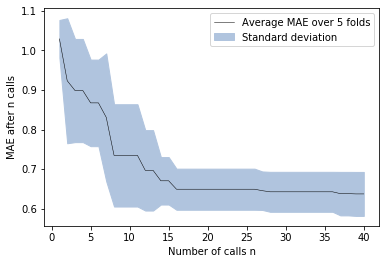

In [41]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

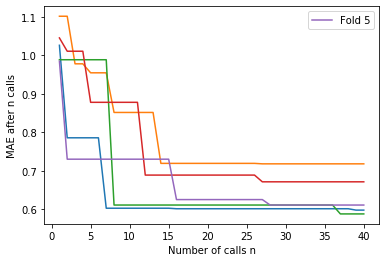

In [42]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [43]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 1.37 kcal/mol
Model 2 MAE: 0.96 kcal/mol
Model 3 MAE: 1.49 kcal/mol
Model 4 MAE: 1.17 kcal/mol
Model 5 MAE: 1.38 kcal/mol

Average MAE: 1.27 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_5282042,1,-0.08,1.80,1.88
1,mobley_6935906,1,0.47,1.44,0.97
2,mobley_1944394,1,-1.47,1.57,3.04
3,mobley_1160109,1,-0.41,-0.32,0.09
4,mobley_6195751,1,1.17,-2.74,3.91
...,...,...,...,...,...
36,mobley_4479135,5,-0.31,1.68,1.99
37,mobley_9257453,5,-2.15,-1.49,0.66
38,mobley_7913234,5,-1.84,-1.77,0.07
39,mobley_4587267,5,-5.46,-7.47,2.01


### Averaged over all models

In [44]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
test_offset_MAE = round(statistics.mean(abs(test_y - avg_offsets)), 2)
print('MAE: {} kcal/mol'.format(test_offset_MAE))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 1.18 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_5282042,-0.08,1.93,2.01
1,mobley_6935906,0.47,1.19,0.72
2,mobley_1944394,-1.47,1.75,3.22
3,mobley_1160109,-0.41,-0.17,0.24
4,mobley_6195751,1.17,-1.69,2.86
5,mobley_4371692,1.45,1.44,0.01
6,mobley_3802803,-0.06,-0.91,0.85
7,mobley_2636578,0.52,2.94,2.42
8,mobley_242480,3.40,2.19,1.21
9,mobley_2126135,-0.89,-0.77,0.12


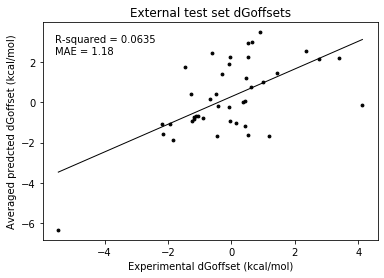

In [45]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'], 
             title='External test set dGoffsets', 
             MAE=test_offset_MAE)

## Corrected hydration free energies

In [46]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# calculated dGhydr uncertainty
test_calc_err = test_fs_df.iloc[:, 6].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc + err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr propogated absolute error
# corr_AE = (err1**2 + err2**2)**0.5
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.76 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_5282042,-3.75,-3.34,0.41,-1.41,2.34
79,mobley_6935906,-9.34,-7.87,1.47,-6.68,2.66
98,mobley_1944394,-5.66,-4.77,0.89,-3.02,2.64
113,mobley_1160109,-14.21,-13.60,0.61,-13.77,0.44
123,mobley_6195751,-11.85,-15.25,3.40,-16.94,5.09
140,mobley_4371692,-5.33,-4.05,1.28,-2.61,2.72
141,mobley_3802803,-4.80,-5.32,0.52,-6.23,1.43
162,mobley_2636578,-4.68,-8.81,4.13,-5.87,1.19
173,mobley_242480,-3.78,-4.30,0.52,-2.11,1.67
180,mobley_2126135,-0.85,-0.76,0.09,-1.53,0.68


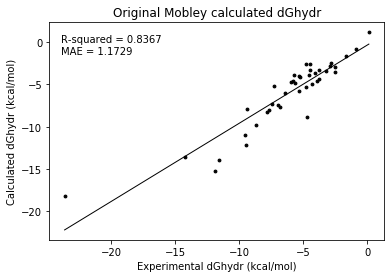

In [47]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'], 
             title='Original Mobley calculated dGhydr', 
             MAE=calc_MAE)

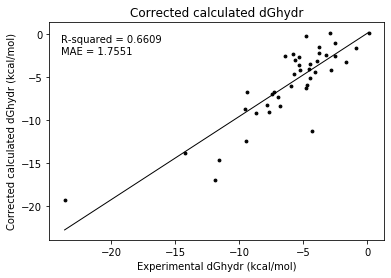

In [48]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'], 
             title='Corrected calculated dGhydr', 
             MAE=corr_MAE)

## Determining high absolute errors

In [49]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

$$ \Delta{G_{offset}} = \Delta{G_{exp}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{offset}} = \Delta{G_{corrected}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{corrected}} = \Delta{G_{calc}} + \Delta{G_{offset}} $$

### Tanimoto Coefficient

$$ T_{a,b}=\frac{M_{a,b}}{M_{a}+M_{b}+M_{a,b}} $$
$$ M_{a}=single test set ligand 1D feature list $$
$$ M_{b}=validation set feature list $$
$$ M_{a,b}= $$

In [50]:
# For each training/validation
#       for each test set molecule
#            compute distribution of Tanimoto to training and validation
#            Plot average distribution tanimoto test to training and compare average distrib validation to training
# Check for trends in training/validation correction improvements

# for fold in kfolds:
#     for training, validation in fold:
#         for test in test_set:
            

In [51]:
def tanimoto(list1, list2):
  intersection = [common_item for common_item in list1 if common_item in list2]
  return float(len(c))/(len(a) + len(b) - len(c))

In [52]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

# draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

16 structures have dGhydr absolute erros < 1.00 kcal/mol


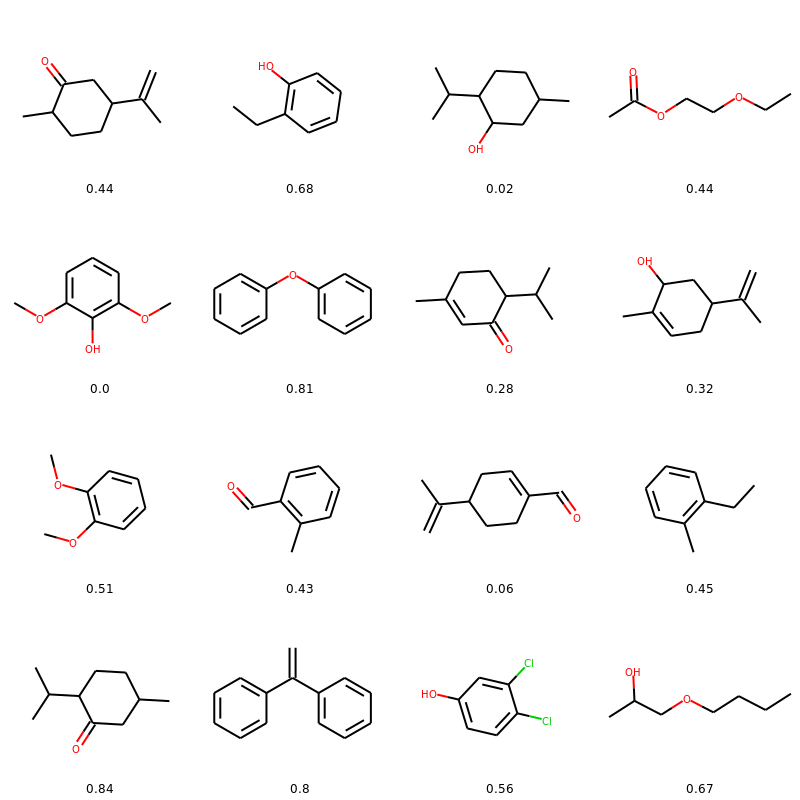

In [53]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

11 structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol


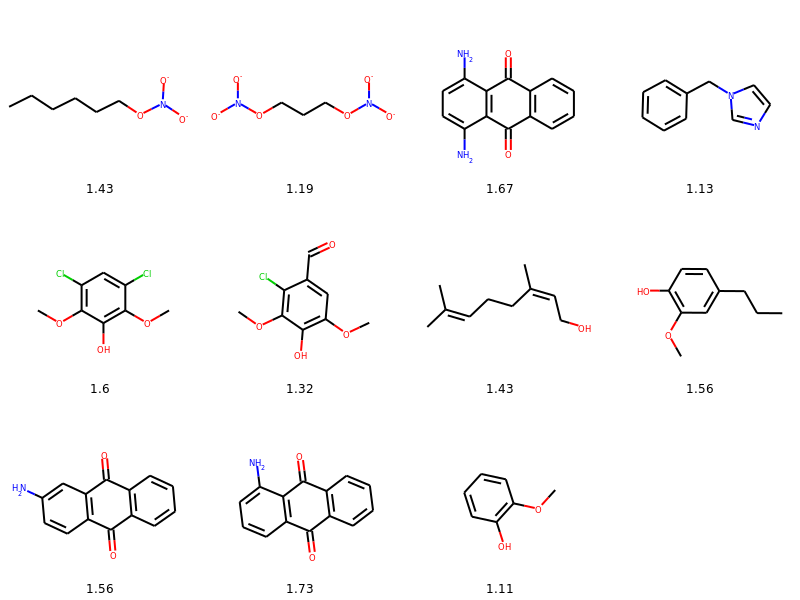

In [54]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

13 structures have dGhydr absolute erros > 2.00 kcal/mol


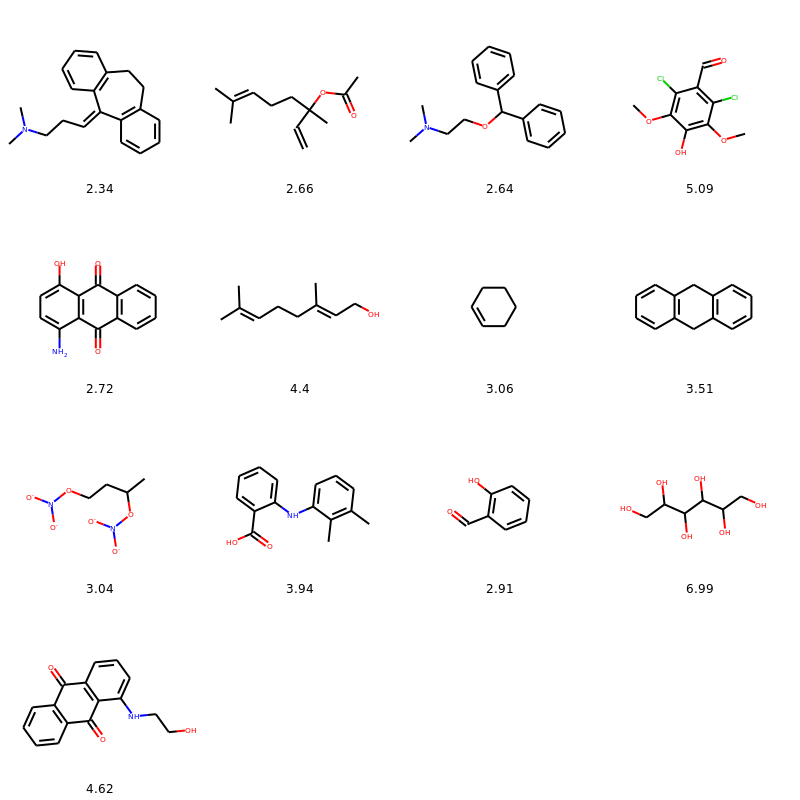

In [55]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)